[markdown記法](https://qiita.com/tbpgr/items/989c6badefff69377da7)

[米国データサイエンティストがやさしく教えるデータサイエンスのためのPython講座](https://www.udemy.com/course/ds_for_python/learn/lecture/21669680#overview)

# Sec.9 CT画像のVisualizationを作る

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
%matplotlib inline

import os
from pathlib import Path

import ctvis

## データのパスをデータフレームにする
#### カラム： FilePathImage, FileName, FilePathMask

In [ ]:
# list_im = glob('public-covid-data/rp_im/*')
# list_msk = glob('public-covid-data/rp_msk/*')
# list_file = []
# for path in list_im:
#     _, filename = os.path.split(path)
#     list_file.append(filename)
# df = pd.DataFrame({'FilePathImage': list_im, 'FileName': list_file, 'FilePathMask': list_msk})

In [2]:
df = ctvis.get_df_all()

## NIfTIデータをNumpy Arrayとしてロードする
- np.rollaxis()で軸を変えることができる

In [3]:
sample_path = df['FilePathImage'].iloc[0]
data = ctvis.load_nifti(sample_path)

## マスクデータをRGBにする

In [4]:
p = df['FilePathMask'].iloc[0]
seg_data = ctvis.load_nifti(p)
mask_color = ctvis.label_color(seg_data)

## 元のCTデータをグレースケールに変換する

In [5]:
index = 0
volume = ctvis.load_nifti(df.iloc[0]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[0]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [6]:
volume_gray = ctvis.hu_to_gray(volume)

In [28]:
volume_gray.shape

(630, 630, 418, 3)

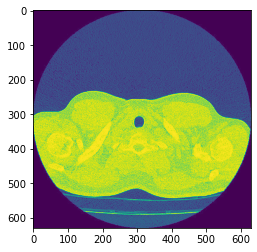

In [27]:
plt.imshow(volume_gray[:, :, 417])